## Clustering - Crime_Data

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [22]:
Crime_Data=pd.read_csv("C:\\ExcelR\\Assignments\\Clustering\\crime_data.csv")

In [3]:
Crime_Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Understanding

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [4]:
Crime_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Data Preprocessing

#### Removing the names of states of america. Because, the names are not necessary for creating the cluster.

In [5]:
Crime_Data=Crime_Data.drop("Unnamed: 0",axis=1)

In [6]:
Crime_Data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Scaling the Data

In [7]:
Standard_Scalar=StandardScaler()
X=pd.DataFrame(Standard_Scalar.fit_transform(Crime_Data))

In [8]:
X.columns=['Murder', 'Assault', 'UrbanPop', 'Rape']
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Cluster Models

## Hierarchial Clustering

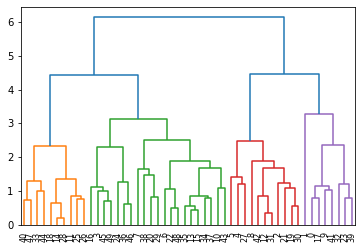

<Figure size 864x864 with 0 Axes>

In [9]:
Dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.figure(figsize=[12,12])
plt.show()

#### From the dendogram we can infer that n_clusters=4 will be good for the cluster model.

In [10]:
Hierarchial_Clustering = AgglomerativeClustering(n_clusters=4, linkage = 'complete')
Hc_Pred=Hierarchial_Clustering.fit_predict(X)

Crime_Data['Hc_Pred']=pd.Series(Hc_Pred)
Crime_Data["Hc_Pred"].value_counts()

1    21
2    11
3    10
0     8
Name: Hc_Pred, dtype: int64

## K-means clustering

#### Finding Optimal number of clusters using Elbow Curve

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(pd.DataFrame(wcss))

            0
0  200.000000
1  104.961633
2   80.088861
3   57.554259
4   50.520266
5   43.927464
6   40.521835
7   34.687388
8   32.706481
9   28.311639


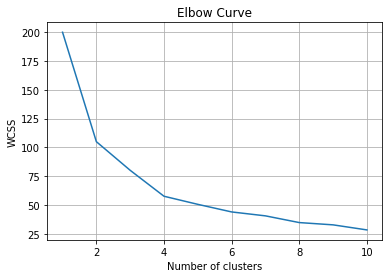

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

In [13]:
Kmeans = KMeans(n_clusters=4,random_state=0)
Kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [14]:
pd.DataFrame(Kmeans.cluster_centers_)

,0,1,2,3
0,-0.494407,-0.386484,0.581676,-0.264310
1,0.702127,1.049994,0.729974,1.289904
2,-0.971303,-1.117836,-0.939550,-0.976578
3,1.426224,0.883211,-0.822791,0.019467


In [15]:
Kmeans.inertia_

57.55425863091104

## DBSCAN 

#### Taking values of eps as 1.1 and minimum_samples as 2 gives us the optimal result.

In [16]:
Dbscan = DBSCAN(eps=1.1, min_samples=2)
Dbscan.fit(X)

DBSCAN(eps=1.1, min_samples=2)

In [17]:
Dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [18]:
Crime_Data['Dbscan_Labels']=pd.Series(Dbscan.labels_)
Crime_Data["Dbscan_Labels"].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: Dbscan_Labels, dtype: int64

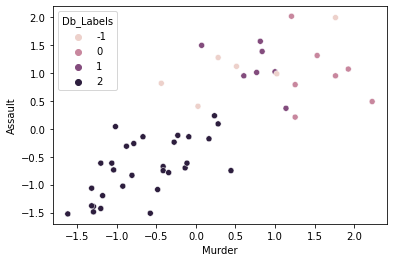

In [19]:
Z=X.copy()
Z["Db_Labels"]=pd.Series(Dbscan.labels_)

sns.scatterplot(x=Z["Murder"],y=Z["Assault"],hue=Z["Db_Labels"])
plt.show()

### Inference

1. All three Clustering techniques gives 4 clusters as optimal number of clusters.
2. Hierarchial clustering and K-means clustering is more suitable to the problem statement as there are no dense points found in the scatterplot created from the datapoints.